In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
default= pd.read_csv('Credit_Data_Original.csv')


In [3]:
new_default=default.drop("OBS#", axis=1)
new_default

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
996,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
997,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
998,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
default.data = new_default.drop("DEFAULT", axis=1)
default.target = new_default["DEFAULT"]

C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [6]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(default.data, default.target)
rf.score(default.data, default.target)

1.0

In [7]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.1106821 , 0.09700364, 0.05884585, 0.02094075, 0.01049658,
       0.0142734 , 0.01615067, 0.0099903 , 0.01122172, 0.12950301,
       0.04753872, 0.05247932, 0.03945386, 0.00831297, 0.01987602,
       0.00965219, 0.00960253, 0.01119239, 0.04032071, 0.02046642,
       0.01384839, 0.1031762 , 0.022405  , 0.01220144, 0.01726973,
       0.02409875, 0.03162153, 0.01443226, 0.0188918 , 0.00405176])

In [8]:
# We can sort the features by their importance
forestResult = sorted(zip(rf.feature_importances_, new_default), reverse=True)
forestResult

[(0.1295030103441189, 'AMOUNT'),
 (0.11068210232322845, 'CHK_ACCT'),
 (0.10317620214627304, 'AGE'),
 (0.09700364393289723, 'DURATION'),
 (0.05884585057165801, 'HISTORY'),
 (0.052479318500692276, 'EMPLOYMENT'),
 (0.04753871663299004, 'SAV_ACCT'),
 (0.04032071254492493, 'PRESENT_RESIDENT'),
 (0.03945386386315822, 'INSTALL_RATE'),
 (0.03162153026450733, 'JOB'),
 (0.024098748450474473, 'NUM_CREDITS'),
 (0.022404999212547058, 'OTHER_INSTALL'),
 (0.02094075245638589, 'NEW_CAR'),
 (0.020466415130160186, 'REAL_ESTATE'),
 (0.019876015347476052, 'MALE_SINGLE'),
 (0.0188917961879869, 'TELEPHONE'),
 (0.01726973361501606, 'OWN_RES'),
 (0.01615066674111619, 'RADIO/TV'),
 (0.014432257913883197, 'NUM_DEPENDENTS'),
 (0.014273398010935398, 'FURNITURE'),
 (0.013848390247025437, 'PROP_UNKN_NONE'),
 (0.012201442684801262, 'RENT'),
 (0.011221717105503539, 'RETRAINING'),
 (0.011192389447064426, 'GUARANTOR'),
 (0.010496576529153551, 'USED_CAR'),
 (0.009990300324844308, 'EDUCATION'),
 (0.009652194383920114, 'M

In [9]:
## Goal: Make an descending dataFrame to show Most Important Columns to least when determining DEFAULT Outcomes.
    # I had difficulty building a dataFrame straight from forestResult. 
        #I had pull the importances' values, create a DataFrame, and set it to as descending to match the forestResult.
importanceRatio_DF= pd.DataFrame({
                          "Importance Rating":importances})
importanceRatio_DF

# To sort from highest to lowest, ascending=False must be passed in & resest index
descendingImportanceRatio_DF= importanceRatio_DF.sort_values("Importance Rating", ascending=False).reset_index(drop=True)
descendingImportanceRatio_DF.head(4)

,Importance Rating
0,0.129503
1,0.110682
2,0.103176
3,0.097004


In [10]:
decendingRating= descendingImportanceRatio_DF['Importance Rating']
decendingRating.head(3)

0    0.129503
1    0.110682
2    0.103176
Name: Importance Rating, dtype: float64

In [11]:
## Pulling Importance Features to correlate to the Importance Ratio was problematic. Importance Features would pull  
## as combined feature and ratio combined unable to split the list in a list. Another pull would result in ex(A,M,O,U,N,T)
## strangely still a float and when tranformed to a string(in order to spilt), it was would return 'NAN'
    # Thus, my reasoning to hard code the values of Importance Features in descending order to match the Importance Ratios 
    #portionately.

descendingFeatures= ['AMOUNT', 'CHK_ACCT','AGE','DURATION','HISTORY','EMPLOYMENT','SAV_ACCT','INSTALL_RATE','PRESENT_RESIDENT','JOB',
'NUM_CREDITS','OTHER_INSTALL','NEW_CAR','TELEPHONE','REAL_ESTATE','MALE_SINGLE','OWN_RES','PROP_UNKN_NONE','RADIO/TV',
 'FURNITURE','NUM_DEPENDENTS','RENT','USED_CAR', 'RETRAINING',
'EDUCATION','MALE_MAR_or_WID','GUARANTOR','MALE_DIV','CO-APPLICANT','FOREIGN']

In [12]:
# intialise data of lists. 
data = {"Prediction_Importance_Feature":descendingFeatures,
        'Importance_Rating':decendingRating} 
  
# Create DataFrame 
print('      Top 10 Importance Features')
print('      __________________________')

finalImportance_df= pd.DataFrame(data) 
finalImportance_df.head(10)

##Image saved as screen snip to ("ImportanceFeatures_DataFrame.png") 

      Top 10 Importance Features
      __________________________


,Prediction_Importance_Feature,Importance_Rating
0,AMOUNT,0.129503
1,CHK_ACCT,0.110682
2,AGE,0.103176
3,DURATION,0.097004
4,HISTORY,0.058846
5,EMPLOYMENT,0.052479
6,SAV_ACCT,0.047539
7,INSTALL_RATE,0.040321
8,PRESENT_RESIDENT,0.039454
9,JOB,0.031622


In [13]:
iloc_10_df = finalImportance_df.iloc[:10].sort_values("Importance_Rating", ascending=True).reset_index(drop=True)
iloc_10_df

,Prediction_Importance_Feature,Importance_Rating
0,JOB,0.031622
1,PRESENT_RESIDENT,0.039454
2,INSTALL_RATE,0.040321
3,SAV_ACCT,0.047539
4,EMPLOYMENT,0.052479
5,HISTORY,0.058846
6,DURATION,0.097004
7,AGE,0.103176
8,CHK_ACCT,0.110682
9,AMOUNT,0.129503


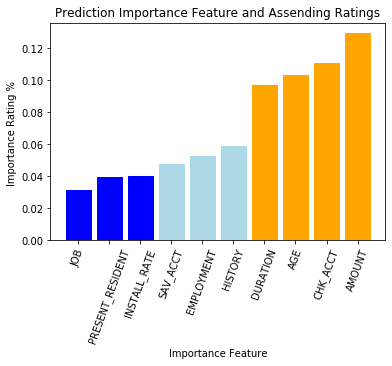

In [14]:
# Bar Plots
X_axis = iloc_10_df['Prediction_Importance_Feature']
y_axis = iloc_10_df['Importance_Rating']

barList = plt.bar(X_axis,y_axis)
#colors 
barList[0].set_color('b')
barList[1].set_color('b')
barList[2].set_color('b')
barList[3].set_color('lightblue')
barList[4].set_color('lightblue')
barList[5].set_color('lightblue')
barList[6].set_color('orange')
barList[7].set_color('orange')
barList[8].set_color('orange')
barList[9].set_color('orange')
# Orient widths. Add labels, tick marks, etc. 
plt.title("Prediction Importance Feature and Assending Ratings")
plt.ylabel("Importance Rating % ")
plt.xlabel("Importance Feature")
plt.xticks(np.arange(0,10,1))
plt.xticks(rotation=70)

# Save the Figure
# plt.savefig("Top10featuresImportance_VERTBar.png")
#Save with snip, x axis label were cut off with savfig.
# Show the Figure
plt.show()


Text(0.5, 1.0, 'Prediction Importance Feature and Assending Ratings')

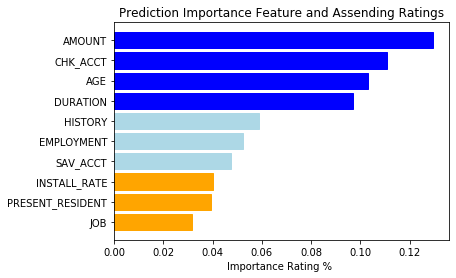

In [15]:
X_axis = iloc_10_df['Prediction_Importance_Feature']
y_axis = iloc_10_df['Importance_Rating']

barList = plt.barh(X_axis, y_axis)
#colors 
barList[0].set_color('orange')
barList[1].set_color('orange')
barList[2].set_color('orange')
barList[3].set_color('lightblue')
barList[4].set_color('lightblue')
barList[5].set_color('lightblue')
barList[6].set_color('blue')
barList[7].set_color('blue')
barList[8].set_color('blue')
barList[9].set_color('blue')


plt.xlabel("Importance Rating % ")
plt.title("Prediction Importance Feature and Assending Ratings")

# Save the Figure
# plt.savefig("Top10featuresImportance_BarH.png") as snip
